# 과제 2 코드

패키지 및 데이터 준비

In [ ]:
# 필요한 라이브러리를 가져옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Excel 파일에서 데이터를 읽어옵니다. 특정 시트를 지정하고, 상위 12행을 건너뛰고 필요한 열만 선택합니다.
restaurant_data = pd.read_excel(
    "데이터 시각화 과제 데이터.xlsx", 
    sheet_name="2.레스토랑매출추정(문제)", 
    skiprows=12
)

# pd.melt를 사용하여 긴 형식의 데이터프레임으로 변환합니다. 이 과정에서 연도별 매출 데이터를 처리합니다.
restaurant_data2 = pd.melt(
    restaurant_data, 
    id_vars=['매장', '개점일'],
    value_vars=['2015년', '2016년', '2017년', '2018년', '2019년'],
    var_name='year', value_name='sales'
).rename(columns={'매장': 'store', '개점일': 'opendate'})

# 연도 데이터에서 '년' 문자를 제거하고 정수 타입으로 변환합니다.
restaurant_data2['year'] = restaurant_data2['year'].str.replace('년', '').astype(int)

# 데이터 모양을 확인합니다.
restaurant_data2

ㅌㅌ

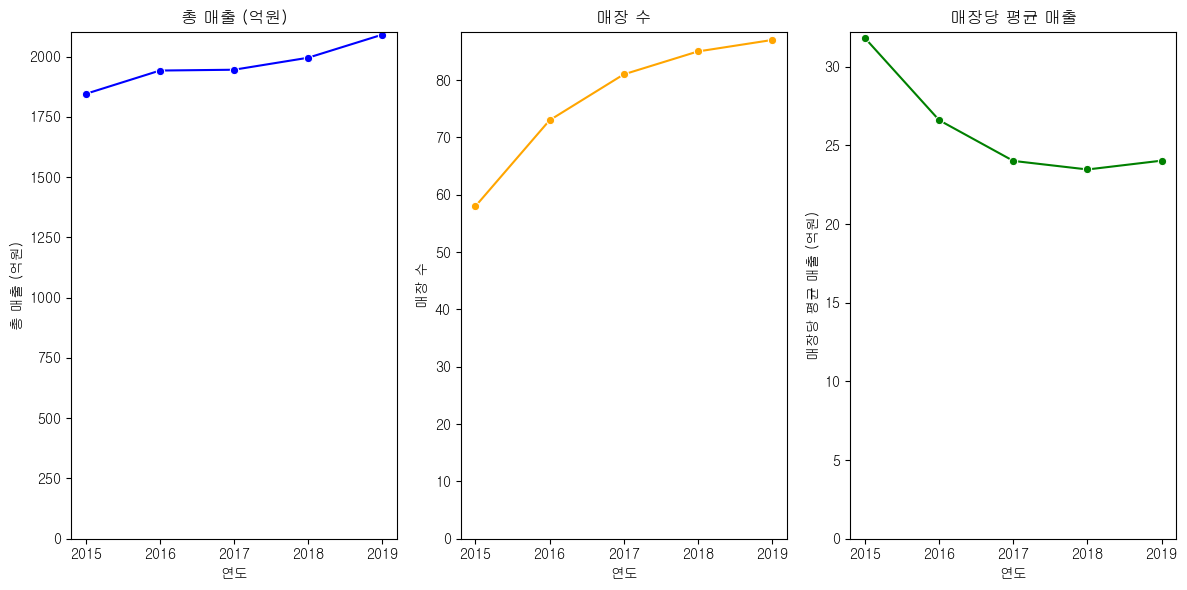

In [48]:
# 매출이 0 이상인 데이터만 필터링하고 연도별로 그룹화하여 집계합니다.
restaurant_summary = restaurant_data2[restaurant_data2['sales'] > 0].groupby('year').agg(
    sales=('sales', 'sum'),  
    n_store=('store', 'nunique'), 
).reset_index()
restaurant_summary['sales_per_store'] = restaurant_summary['sales'] / restaurant_summary['n_store']

# 그래프에 사용될 폰트를 설정합니다.
plt.rcParams['font.family'] = 'Gulim'

# 각 지표별 시각화를 위한 함수를 정의합니다.
def plot_metric(df, subplot_index, x_col, y_col, title, ylabel, color):
    plt.subplot(1, 3, subplot_index)
    sns.lineplot(data=df, x=x_col, y=y_col, marker='o', color=color)
    plt.title(title)
    plt.xlabel('연도')
    plt.ylabel(ylabel)
    # y축이 0에서 시작하도록 설정합니다.
    plt.ylim(0, None)

# 각 지표별 시각화를 실행합니다.
plt.figure(figsize=(12, 6))
metrics = [
    ('sales', '총 매출 (억원)', '총 매출 (억원)', 'blue'),
    ('n_store', '매장 수', '매장 수', 'orange'),
    ('sales_per_store', '매장당 평균 매출', '매장당 평균 매출 (억원)', 'green')
]

for index, (col, title, ylabel, color) in enumerate(metrics, start=1):
    plot_metric(restaurant_summary, index, 'year', col, title, ylabel, color)

plt.tight_layout()
plt.show()

ㅌㅌ

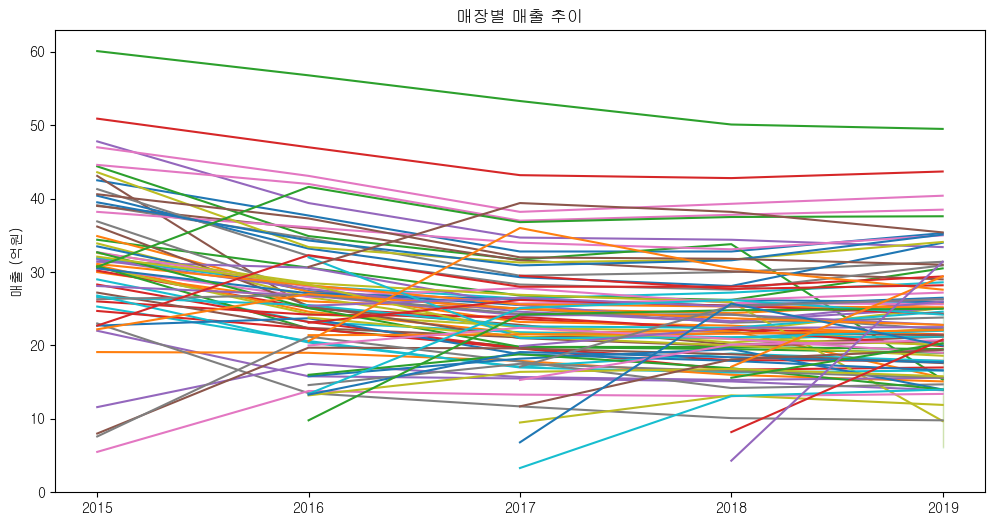

In [50]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=restaurant_data2, x='year', y='sales', hue='store', legend=None, palette='tab10')

plt.title('매장별 매출 추이')
plt.xlabel('')
plt.ylabel('매출 (억원)')
plt.ylim(0, None)
plt.xticks(range(int(year_min), int(year_max) + 1))

plt.show()

ㅌㅌ

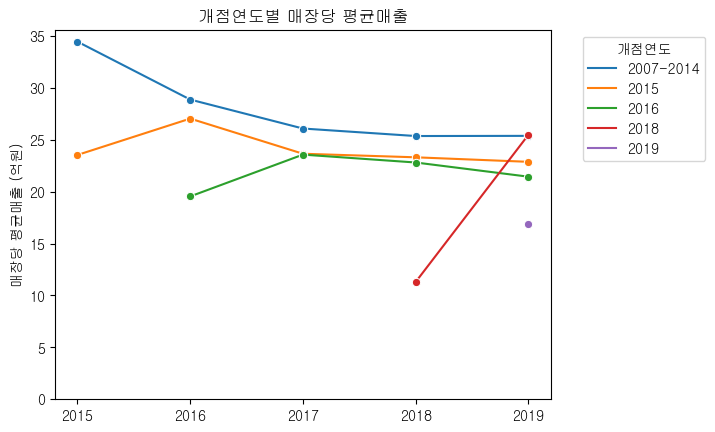

In [44]:
restaurant_data3 = restaurant_data2.copy()
restaurant_data3['openyear'] = pd.DatetimeIndex(restaurant_data3['opendate']).year

# openyear2의 값에 따라 다양한 범주를 설정합니다.
conditions = [
    restaurant_data3['openyear'].between(2007, 2014),
    restaurant_data3['openyear'] == 2015,
    restaurant_data3['openyear'] == 2016,
    restaurant_data3['openyear'] == 2018,
    restaurant_data3['openyear'] == 2019
]
choices = ['2007-2014', '2015', '2016', '2018', '2019']
restaurant_data3['openyear2'] = np.select(conditions, choices, default='Exclude')

# '.exclude'를 제외하고 집계를 수행합니다.
restaurant_data3 = restaurant_data3[restaurant_data3['openyear2'] != 'Exclude']
restaurant_summary3 = restaurant_data3.groupby(['openyear2', 'year']).agg(
    sales=('sales', 'sum'),
    n_store=('store', 'nunique'),
).reset_index()
restaurant_summary3['sales_per_store'] = restaurant_summary3['sales'] / restaurant_summary3['n_store']

# 매출이 0보다 큰 데이터만 필터링합니다.
restaurant_summary3 = restaurant_summary3[restaurant_summary3['sales'] > 0]

# 개선된 버전: 연도별 매장당 평균매출을 시각화합니다.
sns.lineplot(data=restaurant_summary3, x='year', y='sales_per_store', hue='openyear2', palette='tab10', marker='o')
plt.title('개점연도별 매장당 평균매출')
plt.xlabel('')
plt.ylabel('매장당 평균매출 (억원)')
plt.ylim(0, None)
plt.legend(title='개점연도', bbox_to_anchor=(1.05, 1), loc='upper left')

# 연도별 눈금을 정확하게 표시합니다.
plt.xticks(range(int(year_min), int(year_max) + 1))
plt.show()